In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression , BayesianRidge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.model_selection import train_test_split  as tts
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt

## Carga del dataset

In [66]:
data = pd.read_csv("Datos_Clima_Diarios_Campanula2.csv", sep = ";")
data.columns = [i.replace(".", "_") for i in data.columns]
data = data.iloc[:,1:]

## Parsear los datos a tipo float

In [67]:
for i in data.columns:
    data[i] = [str(j).replace(",",".") for j in data[i]]
    data[i] = data[i].astype("float64")

## Escalamos los datos

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_es = pd.DataFrame(scaler.transform(data),columns = data.columns)
data_es

,Lluvia_mm,Humedad_por,Dir_Viento_Gr,Punto_Rocio_gc,UV_Index,Temperatura_gc,Max_Temperatura_gc,Min_Temperatura_gc,Vel_Viento_km_h,Radiacion_Solar_w_m2,Evapotranspiracion_mm,Presion_Atm_hpa,Tallos_Campanula
0,0.867816,-0.132953,0.746022,-1.100245,-0.147563,-1.137066,-1.076485,0.149065,-1.649269,-0.395736,-0.236053,-0.018976,-0.763365
1,-0.458059,0.086785,1.264367,-1.021677,-0.151097,-1.124973,1.300740,-1.697884,-1.030714,0.525620,-0.143387,0.692221,-0.804684
2,-0.415289,-0.115566,1.228341,-0.944551,-0.132935,-0.770054,1.147134,-2.403721,-0.038603,0.675118,-0.097661,1.561520,-0.941327
3,0.055183,-0.303852,0.550578,0.043043,-0.157716,0.049326,-0.198740,0.167175,0.731615,-0.281942,-0.187843,1.854540,-0.943139
4,-0.458059,-1.410922,-0.131700,-0.494410,-0.127842,0.709642,0.386422,-0.162559,1.667240,1.261228,-0.041773,2.291485,-0.953288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,-0.458059,-0.827216,0.680880,-0.437711,8.405140,0.229980,0.474197,0.208391,-0.098629,-3.215674,7.146139,1.122989,2.207629
1519,-0.458059,0.174164,0.375179,-0.380419,4.568774,-0.593117,-0.718073,0.131110,0.260851,-3.216932,4.834423,0.404974,1.702738
1520,-0.458059,1.490039,0.247653,0.000843,4.866816,-1.298779,-0.037821,-0.033757,-0.794657,-3.216882,4.656599,0.143104,1.213069
1521,1.252748,1.805059,0.097324,0.481543,3.609618,-0.618894,-0.738486,0.816339,-1.284306,-3.217287,3.983407,0.258327,1.010315


## Separamos los datos de la variable objetivo

In [69]:
X = data_es.loc[:,data_es.columns != 'Tallos_Campanula']
y = data_es['Tallos_Campanula']

## Dividimos los datos en train y test

In [77]:
X_train, X_test, y_train, y_test = tts(X, y,  test_size=0.2,random_state=0)

## Modelado predictivo
* Ahora predeciremos si el cliente se auto curará o no usando algunos algoritmos de regresión. A continuación se muestran los algoritmos que usaremos para construir el modelo:

    * LinearRegression 
    
    * linear_model.Lasso
    
    * SVR

    * RandomForestRegressor

    * KNeighborsRegressor

    * BayesianRidge

    * DecisionTreeRegressor

        
 ### Nota: Se prueban los modelos en crudo antes mencionados para luego escoger el de mejor rendimiento. 
    



In [123]:
lr = LinearRegression()
lrl = linear_model.Lasso(alpha=0.1)
svr = SVR()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor() 
rfr = RandomForestRegressor(n_estimators=100)

## Entrenamos los modelos y realizamos predicciones

In [153]:
all_regs = [lr, lrl, svr, tree, knn, rfr]
regs_labels = ["lr", "lrl","svr", "tree", "knn", "rfr"]
mae_reg = {}
for reg, label in zip(all_regs, regs_labels):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    mae_reg[label]=mean_absolute_error(y_test,y_pred)

## Visualizamos las metricas de cada modelo

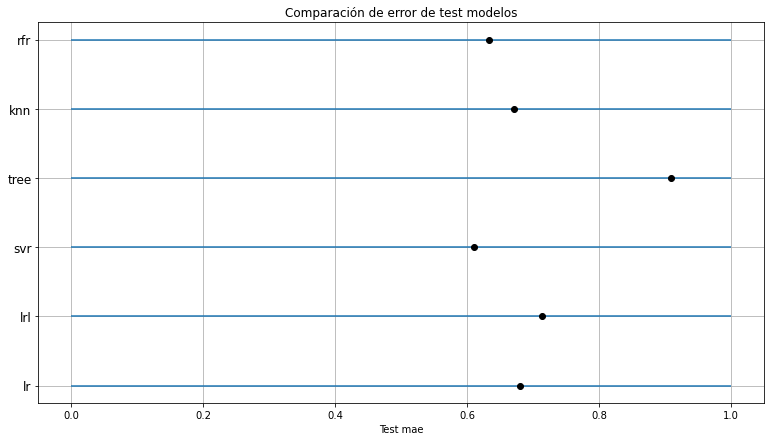

In [145]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.hlines(mae_reg.keys(), xmin=0, xmax=1)
ax.plot(mae_reg.values(), mae_reg.keys(), "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos')
ax.set_xlabel('Test mae')
plt.grid()
plt.show()

## Construimos un modelo StackingRegressor

In [161]:
estimators = [('svr', svr),
              ('rfr', rfr)]

stack_reg = StackingRegressor(estimators = estimators,
                                       final_estimator = svr)


In [156]:
all_regs = [lr, lrl, svr, tree, knn, rfr, stack_reg]
regs_labels = ["lr", "lrl","svr", "tree", "knn", "rfr", "stack_reg"]
mae_reg = {}
for reg, label in zip(all_regs, regs_labels):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    mae_reg[label]=mean_absolute_error(y_test,y_pred)

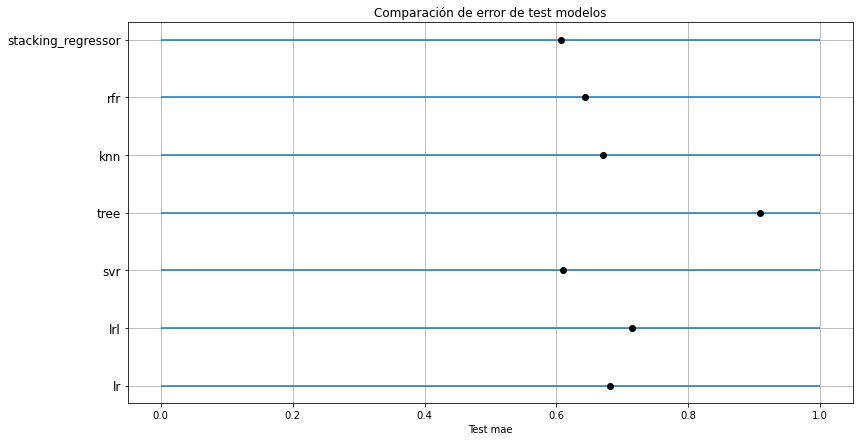

In [157]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.hlines(mae_reg.keys(), xmin=0, xmax=1)
ax.plot(mae_reg.values(), mae_reg.keys(), "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos')
ax.set_xlabel('Test mae')
plt.grid()
plt.show()

## Construimos un modelo VotingRegressor

In [163]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor(estimators=[('lr',lr),
                                              ('lrl',lrl),
                                              ('svr',svr),
                                              ('tree',tree),
                                              ('knn',knn),
                                              ('rfr',rfr)])

In [164]:
all_regs = [lr, lrl, svr, tree, knn, rfr, stack_reg, vot_reg]
regs_labels = ["lr", "lrl","svr", "tree", "knn", "rfr", "stack_reg", "vot_reg"]
mae_reg = {}
for reg, label in zip(all_regs, regs_labels):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    mae_reg[label]=mean_absolute_error(y_test,y_pred)

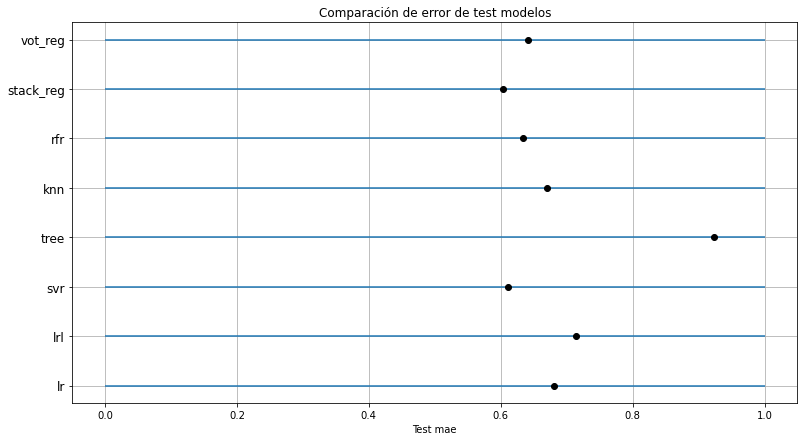

In [165]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.hlines(mae_reg.keys(), xmin=0, xmax=1)
ax.plot(mae_reg.values(), mae_reg.keys(), "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos')
ax.set_xlabel('Test mae')
plt.grid()
plt.show()

## Conclusiones:
    * Teneiendo en cuenta la distribución de los datos se evidencia un **mae** alto en cada modelo.
    * 